In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from math import gcd

In [43]:
# Question 8

In [44]:
# part c

In [62]:
A = np.array([[0,1,0,1,1,0,0,0,1],
              [0,0,1,0,0,0,0,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,1,1,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,1,0,1,0,0],
              [0,0,0,0,0,1,0,1,0],
              [0,0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0]
              ])
paths = 0
C = np.eye(9)
for i in range(8):
  C = C @ A
  paths += C[0,6]
print("total number of paths = ", paths)

total number of paths =  79.0


In [7]:
# Question 9

In [22]:
# part a

In [57]:
def stronly_connected(A):
  B = np.zeros(A.shape)
  C = np.eye(A.shape[0])
  for i in range(1, A.shape[0]+1):
    C = C @ A
    B = B + C
  if (B>0).all():
    print(" Strongly Connected ")
  else:
    print(" Not Strongly Connected ")

In [58]:
# part b
A = np.array([[0,1,0,1,1,0,0,0,1],
              [0,0,1,0,0,0,0,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,1,1,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,1,0,1,0,0],
              [0,0,0,0,0,1,0,1,0],
              [0,0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0]
              ])

In [59]:
stronly_connected(A)

 Strongly Connected 


In [26]:
# Question 10

In [27]:
# part a

In [28]:
def display_all_simple_cycles(G):
  cycles = list(nx.simple_cycles(G))
  for i in range(len(cycles)):
    cycle = G.subgraph(cycles[i])
    nx.draw_networkx(cycle, with_labels=True)
    plt.show()

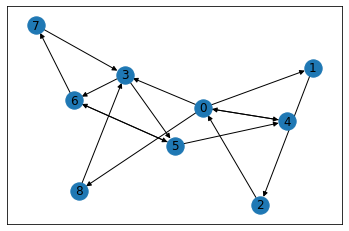

In [42]:
# Testing

# build a graph with adjacency matrix
A = np.array([[0,1,0,1,1,0,0,0,1],
              [0,0,1,0,0,0,0,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,1,1,0,0],
              [1,0,0,0,0,0,0,0,0],
              [0,0,0,0,1,0,1,0,0],
              [0,0,0,0,0,1,0,1,0],
              [0,0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0]
              ])
G = nx.DiGraph(A)
nx.draw_networkx(G, with_labels=True)
plt.show()

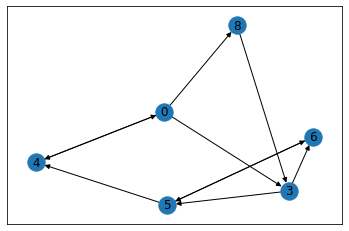

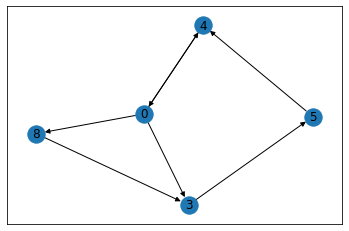

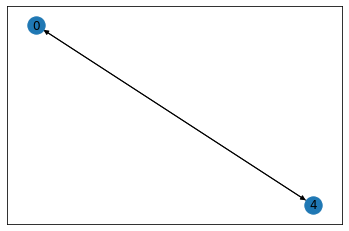

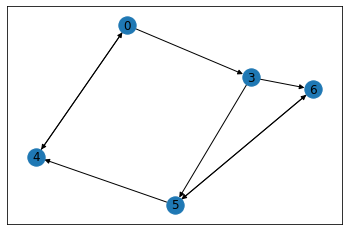

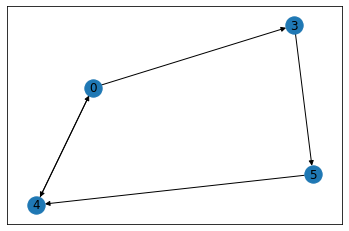

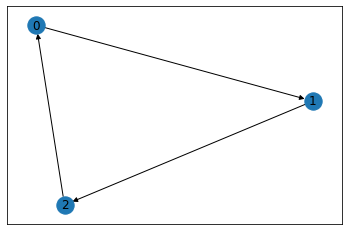

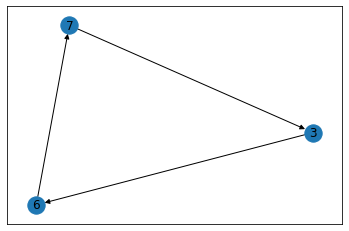

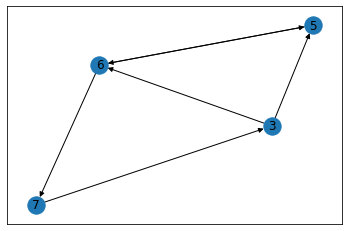

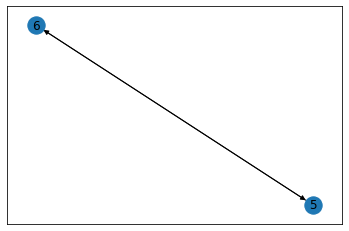

In [37]:
display_all_simple_cycles(G)

In [38]:
# part b

In [39]:
# Is it cyclic or acyclic
def friends(vec):
  frnd=[]
  for i in range(len(vec)):
    if vec[i]==1:
      frnd.append(i)
  return frnd
def isCyclicUtil(v, visited, recStack, A): 
  visited[v] = True
  recStack[v] = True
  for neighbour in friends(A[v]): 
      if visited[neighbour] == False: 
          if isCyclicUtil(neighbour, visited, recStack, A) == True: 
              return True
      elif recStack[neighbour] == True: 
          return True
  recStack[v] = False
  return False
def isCyclic(V, A): 
    visited = [False] * V 
    recStack = [False] * V 
    for node in range(V): 
        if visited[node] == False: 
            if isCyclicUtil(node,visited,recStack,A) == True: 
                return True
    return False

In [40]:
# switzerland input
isCyclic(9, A)

True

In [41]:
# is it periodic or aperiodic

# switzerland input
G = nx.DiGraph(A)

# code
cycles = list(nx.simple_cycles(G))
cycles_sizes = [len(c) for c in cycles]
cycles_gcd = reduce(gcd, cycles_sizes)
is_periodic = cycles_gcd > 1
if is_periodic:
  print('Yes, This graph is periodic with period = ', cycles_gcd)
else:
  print('The graph is aperiodic')

The graph is aperiodic
